<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Data-and-Create-ICA_DATA-Object" data-toc-modified-id="Import-Data-and-Create-ICA_DATA-Object-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Data and Create ICA_DATA Object</a></span><ul class="toc-item"><li><span><a href="#Rename-iModulons" data-toc-modified-id="Rename-iModulons-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Rename iModulons</a></span></li></ul></li><li><span><a href="#Regulon-Venn-Diagram" data-toc-modified-id="Regulon-Venn-Diagram-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regulon Venn Diagram</a></span></li><li><span><a href="#Activity-Analysis/Plotting" data-toc-modified-id="Activity-Analysis/Plotting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Activity Analysis/Plotting</a></span><ul class="toc-item"><li><span><a href="#Activity-Plots" data-toc-modified-id="Activity-Plots-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Activity Plots</a></span></li></ul></li><li><span><a href="#DIMA-Plots" data-toc-modified-id="DIMA-Plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>DIMA Plots</a></span><ul class="toc-item"><li><span><a href="#Custom-DIMA-Plots" data-toc-modified-id="Custom-DIMA-Plots-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Custom DIMA Plots</a></span></li><li><span><a href="#1D-DIMA-Plot" data-toc-modified-id="1D-DIMA-Plot-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>1D DIMA Plot</a></span></li></ul></li><li><span><a href="#PhoP/WhiB3-Discovery" data-toc-modified-id="PhoP/WhiB3-Discovery-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>PhoP/WhiB3 Discovery</a></span><ul class="toc-item"><li><span><a href="#Regulon/iModulon-Venn-Diagram" data-toc-modified-id="Regulon/iModulon-Venn-Diagram-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Regulon/iModulon Venn Diagram</a></span></li><li><span><a href="#Acquire-all-Samples" data-toc-modified-id="Acquire-all-Samples-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Acquire all Samples</a></span></li><li><span><a href="#Gene-Expression-Plot" data-toc-modified-id="Gene-Expression-Plot-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Gene Expression Plot</a></span></li><li><span><a href="#Activity-Plot" data-toc-modified-id="Activity-Plot-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Activity Plot</a></span></li></ul></li><li><span><a href="#Rv0681-Discovery" data-toc-modified-id="Rv0681-Discovery-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Rv0681 Discovery</a></span></li></ul></div>

In [1]:
import sys

from pymodulon.core import *
from pymodulon.plotting import *
from pymodulon.enrichment import *
from pymodulon.compare import *
from pymodulon.io import *
from pymodulon.util import *

from Bio.KEGG import REST
import tqdm.notebook as tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_venn import *
import seaborn as sns

from matplotlib.lines import Line2D


# Import Data and Create ICA_DATA Object

In [2]:
interim = "../data/interim/ica_runs/180/"
processed = "../data/processed_data/"

ica_data = IcaData(interim+"S.csv",interim+"A.csv", X=processed+"log_tpm_norm.csv",
                  sample_table=processed+"metadata_final.csv", trn = processed+"TRN.csv",
                   gene_table=processed+"gene_info.csv")


## Rename iModulons

In [3]:
comp_names = list(pd.read_csv(processed+"iModulon_names.csv",index_col=0).index)

rename = {}

for old,new in zip(range(0,80),comp_names):
    rename.update({old:new})

ica_data.rename_imodulons(rename)

ica_data.change_threshold("Central Carbon Metabolism",.05)
ica_data.change_threshold("Peptidoglycan Biosynthesis",.06)
ica_data.change_threshold("Lsr2",.05)


ica_data.A.head()

,SRX3995807,SRX3995806,SRX3995809,SRX3995808,SRX4619048,SRX4619047,SRX4619049,SRX4619050,SRX3995804,SRX3995805,...,SRX4498326,SRX4498328,SRX4498330,SRX4498336,SRX4498333,SRX4498338,SRX4498329,SRX4498325,SRX4498327,SRX4498331
SigH,2.233529,1.747683,1.950159,1.272614,2.236327,1.461665,1.721740,1.716646,0.199084,-0.199084,...,-0.073048,-0.089859,-0.056653,0.272666,0.561386,0.565625,0.928080,0.692540,0.989420,0.978320
Polyketide Synthase Complex,-1.006571,-1.096669,-1.035640,-1.020379,-1.284973,-1.032381,-0.228997,-0.436043,-0.339446,0.339446,...,-0.060317,0.071409,0.197522,4.220594,4.335245,4.791054,2.873865,3.053068,3.106209,2.544357
IniR,-1.633546,-1.525702,-0.973362,-0.412119,-1.575615,-0.661602,-0.413391,-1.286532,-0.227573,0.227573,...,-0.082660,-0.249290,0.542238,-1.337300,-1.332386,-0.657241,-1.025463,-0.751884,-0.543233,-0.929784
PyrR,0.724746,0.685656,0.463208,0.779347,0.891500,0.706596,1.367180,1.396856,0.426180,-0.426180,...,0.094624,0.297912,-0.241379,1.186755,0.660442,0.640216,1.951114,2.235133,2.241501,1.747601
WhiB4,-0.187071,0.778767,-0.132223,0.820021,0.097570,1.035989,1.112930,0.707870,0.450103,-0.450103,...,-0.196057,-0.186073,0.212741,1.362617,1.387968,1.945811,1.459615,2.011044,1.298987,1.454773


# Regulon Venn Diagram

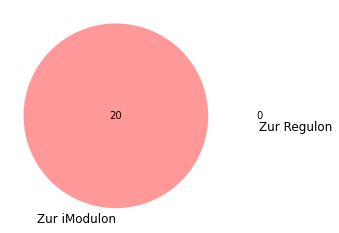

In [4]:
fig,ax = plt.subplots()
zur_imod = set(ica_data.view_imodulon("Zur").index)
zur_regulon = set(ica_data.trn.loc[ica_data.trn["regulator"]=="Rv2359"].gene_id)
venn2([zur_imod,zur_regulon],["Zur iModulon","Zur Regulon"])
#plt.savefig("../figures/interim_figures/Zur_Venn.svg",transparent=True)

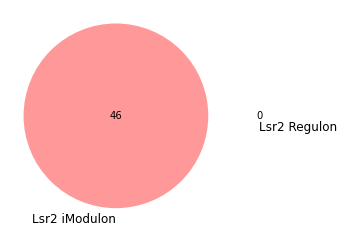

In [5]:
fig,ax = plt.subplots()
lsr2_imod = set(ica_data.view_imodulon("Lsr2").index)
lsr2_regulon = set(ica_data.trn.loc[ica_data.trn["regulator"]=="Rv3597c"].gene_id)
venn2([lsr2_imod,lsr2_regulon],["Lsr2 iModulon","Lsr2 Regulon"])
#plt.savefig("../figures/interim_figures/Lsr2_Venn.svg",transparent=True)

# Activity Analysis/Plotting

## Activity Plots

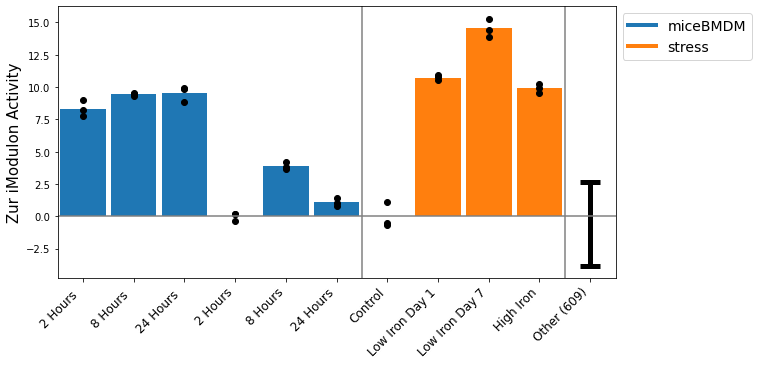

In [6]:
#Put projects of interest here
projects = ["miceBMDM","stress"]
#Put IMod whose activities you would like to look at here
imod = "Zur"



cmap = plt.cm.get_cmap("tab10")
colors = cmap(np.arange(cmap.N))

fig,ax = plt.subplots(figsize=[10,5])
seperators = []
dots = []
# Put in labels of the conditions. You need one label for every condition in every project. The labels
# will be put in order from left to right. 
labels=["2 Hours ", "8 Hours ", "24 Hours ",
        "2 Hours","8 Hours","24 Hours",
        "Control","Low Iron Day 1", "Low Iron Day 7","High Iron"]

label_count = 0
color_count = 0
for project in projects:
    for i,j in ica_data.sample_table.groupby(["project","condition"]):
        if i[0] ==  project:
            if i[0] == "stress":
                if i[1] in [".4_gluc","1_days_low_iron","7_days_low_iron","high_iron"]:
                    dots.append(list(ica_data.A[j.index].loc[imod]))
                    ax.bar(labels[label_count],ica_data.A[j.index].mean(axis=1)[imod],
                           width=.9,color=colors[color_count])
                    label_count+=1
            else:
                dots.append(list(ica_data.A[j.index].loc[imod]))
                ax.bar(labels[label_count],ica_data.A[j.index].mean(axis=1)[imod],
                       width=.9,color=colors[color_count])
                label_count+=1
    color_count+=1
        
            

sep_pos = -.5
dot_pos = 0
    
for condition in dots:
    for dot in condition:
        ax.plot(dot_pos,dot,"ko")
    dot_pos+=1
    
non_mifH = ica_data.A.loc[imod]
for i in projects:
    non_mifH = non_mifH.drop(list(ica_data.sample_table.loc[ica_data.sample_table["project"]==i].index))
mean = non_mifH.mean()
std_dev = non_mifH.std()

ax.errorbar(label_count,mean,yerr= std_dev, label="Other", color = "black",
            marker=None ,capsize=10, capthick = 5,elinewidth=5)

ylimits = ax.get_ylim()
ax.set_xlim([-.5,label_count+.5])
ax.plot(list(ax.get_xlim()),[0,0],color="gray")
ax.set_ylim(ylimits)
ax.set_ylabel(imod+" iModulon Activity",fontsize=15)

# This section controls how the seperators are put down. You count the number of samples in each project and 
# combine them in a array
seperators = [6,4]

for cord in seperators:
    sep_pos+=cord
    ax.plot([sep_pos,sep_pos],ylimits,color="gray")

custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4)]
ax.legend(custom_lines,projects,bbox_to_anchor=(1, 1), loc='upper left',fontsize=14)

labels.append("Other ("+str(len(non_mifH))+")")
plt.xticks(labels,fontsize=12)
for label in ax.get_xmajorticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment("right")
    
#plt.savefig("../figures/interim_figures/Zur_Activities.svg",transparent=True)

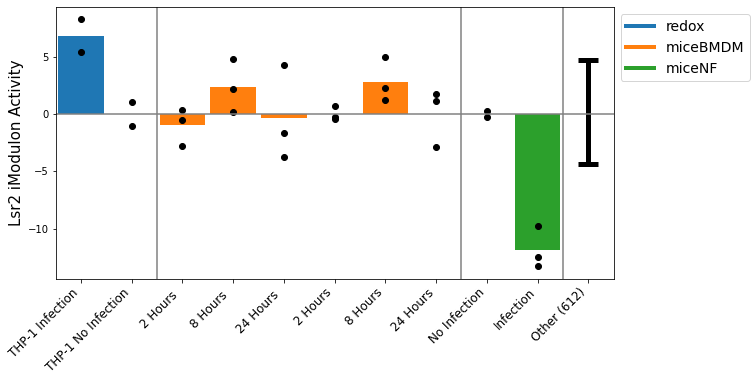

In [7]:
#Put projects of interest here
projects = ["redox","miceBMDM","miceNF"]
#Put IMod whose activities you would like to look at here
imod = "Lsr2"



cmap = plt.cm.get_cmap("tab10")
colors = cmap(np.arange(cmap.N))

fig,ax = plt.subplots(figsize=[10,5])
seperators = []
dots = []
# Put in labels of the conditions. You need one label for every condition in every project. The labels
# will be put in order from left to right. 
labels=["THP-1 Infection","THP-1 No Infection",
        "2 Hours ", "8 Hours ", "24 Hours ", "2 Hours","8 Hours","24 Hours",
        "No Infection","Infection", 
       ]

label_count = 0
color_count = 0
for project in projects:
    for i,j in ica_data.sample_table.groupby(["project","condition"]):
        if i[0] ==  project:
            if i[0] == "redox":
                if "intra" in i[1] or "wt_6.6" in i[1]:
                    dots.append(list(ica_data.A[j.index].loc[imod]))
                    ax.bar(labels[label_count],ica_data.A[j.index].mean(axis=1)[imod],
                           width=.9,color=colors[color_count])
                    label_count+=1
            else:
                dots.append(list(ica_data.A[j.index].loc[imod]))
                ax.bar(labels[label_count],ica_data.A[j.index].mean(axis=1)[imod],
                       width=.9,color=colors[color_count])
                label_count+=1
    color_count+=1
        
            

sep_pos = -.5
dot_pos = 0
    
for condition in dots:
    for dot in condition:
        ax.plot(dot_pos,dot,"ko")
    dot_pos+=1

    
non_mifH = ica_data.A.loc[imod]
for i in projects:
    non_mifH = non_mifH.drop(list(ica_data.sample_table.loc[ica_data.sample_table["project"]==i].index))
mean = non_mifH.mean()
std_dev = non_mifH.std()

ax.errorbar(label_count,mean,yerr= std_dev, label="Other", color = "black",
            marker=None ,capsize=10, capthick = 5,elinewidth=5)

ylimits = ax.get_ylim()
ax.set_xlim([-.5,label_count+.5])
ax.plot(list(ax.get_xlim()),[0,0],color="gray")
ax.set_ylim(ylimits)
ax.set_ylabel(imod+" iModulon Activity",fontsize=15)

# This section controls how the seperators are put down. You count the number of samples in each project and 
# combine them in a array
seperators = [2,6,2]

for cord in seperators:
    sep_pos+=cord
    ax.plot([sep_pos,sep_pos],ylimits,color="gray")

custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4)]
ax.legend(custom_lines,projects,bbox_to_anchor=(1, 1), loc='upper left',fontsize=14)

labels.append("Other ("+str(len(non_mifH))+")")
plt.xticks(labels,fontsize=12)
for label in ax.get_xmajorticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment("right")
    
#plt.savefig("../figures/interim_figures/Lsr2_Activities.svg",transparent = True)



# DIMA Plots

## Custom DIMA Plots

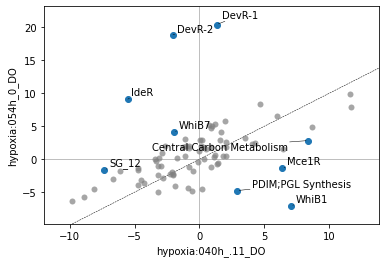

In [8]:
starved_samp = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="054h_0_DO"].index
starved_data = (ica_data.A[starved_samp].mean(axis=1))
ctrl_sample = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="040h_.11_DO"].index
ctrl_data = (ica_data.A[ctrl_sample].mean(axis=1))

dima,table = plot_dima(ica_data,"hypoxia:040h_.11_DO","hypoxia:054h_0_DO",table=True,threshold=5)

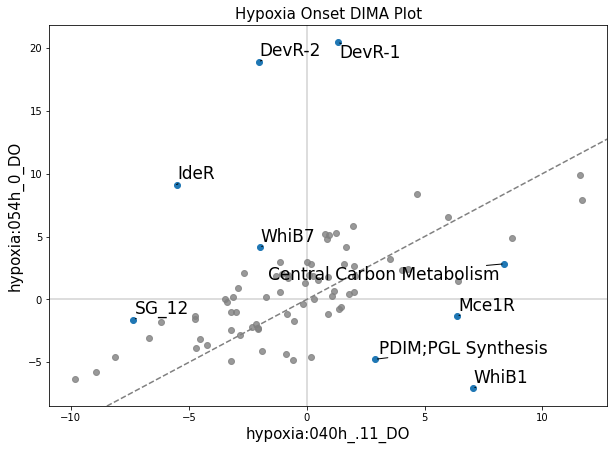

In [9]:
from pymodulon.plotting import _fit_line
fig,ax = plt.subplots(figsize=[10,7])
labels = []
for i in range(0,80):
    if ctrl_data.index[i] in list(table.index):
        if abs(table.loc[ctrl_data.index[i]]["difference"]) > 5:
            ax.plot(ctrl_data[i],starved_data[i],"o",color="tab:blue")
            labels.append(ax.text(ctrl_data[i],starved_data[i],ctrl_data.index[i],fontsize=17))
        else:            
            ax.plot(ctrl_data[i],starved_data[i],"o",color="tab:blue")

    else:
        ax.plot(ctrl_data[i],starved_data[i],"o",color="gray",alpha=.8)
        
adjust_text(labels,ax=ax,arrowprops=dict(arrowstyle="-",color="k",lw=1),
            only_move={"text": "xy","objexts":"xy"})

ax.set_ylim(ax.get_ylim())
ax.set_xlim(ax.get_xlim())
ax.plot([0,0],ax.get_ylim(),color="lightgray",zorder=0)
ax.plot(ax.get_xlim(),[0,0],color="lightgray",zorder=0)
ax.plot([-30,30],[-30,30],color = "gray",linestyle="dashed")

ax.set_xlabel("hypoxia:040h_.11_DO",fontsize=15)
ax.set_ylabel("hypoxia:054h_0_DO",fontsize=15)
ax.set_title("Hypoxia Onset DIMA Plot",fontsize=15)
plt.savefig("../figures/interim_figures/Hypoxia_Onset_DIMA.svg",transparent=True)

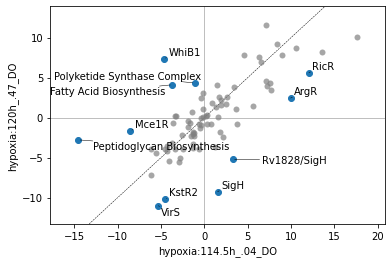

In [10]:
starved_samp = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="120h_.47_DO"].index
starved_data = (ica_data.A[starved_samp].mean(axis=1))
ctrl_sample = ica_data.sample_table.loc[ica_data.sample_table["condition"]=="114.5h_.04_DO"].index
ctrl_data = (ica_data.A[ctrl_sample].mean(axis=1))

dima,table = plot_dima(ica_data,"hypoxia:114.5h_.04_DO","hypoxia:120h_.47_DO",table=True,threshold=5)

Text(0.5, 1.0, 'Reaeration Response DIMA Plot')

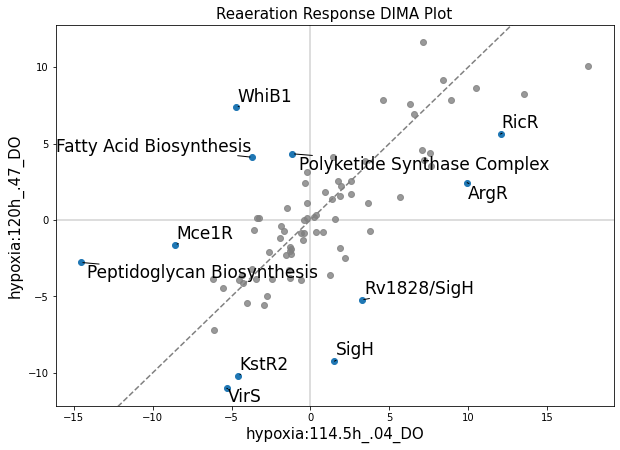

In [11]:
from pymodulon.plotting import _fit_line
fig,ax = plt.subplots(figsize=[10,7])
labels = []
for i in range(0,80):
    if ctrl_data.index[i] in list(table.index):
        if abs(table.loc[ctrl_data.index[i]]["difference"]) > 5:
            ax.plot(ctrl_data[i],starved_data[i],"o",color="tab:blue")
            labels.append(ax.text(ctrl_data[i],starved_data[i],ctrl_data.index[i],fontsize=17))
        else:            
            ax.plot(ctrl_data[i],starved_data[i],"o",color="tab:blue")

    else:
        ax.plot(ctrl_data[i],starved_data[i],"o",color="gray",alpha=.8)
        
adjust_text(labels,ax=ax,arrowprops=dict(arrowstyle="-",color="k",lw=1),
            only_move={"text": "xy","objexts":"xy"})

ax.set_ylim(ax.get_ylim())
ax.set_xlim(ax.get_xlim())
ax.plot([0,0],ax.get_ylim(),color="lightgray",zorder=0)
ax.plot(ax.get_xlim(),[0,0],color="lightgray",zorder=0)
ax.plot([-30,30],[-30,30],color = "gray",linestyle="dashed")

ax.set_xlabel("hypoxia:114.5h_.04_DO",fontsize=15)
ax.set_ylabel("hypoxia:120h_.47_DO",fontsize=15)
ax.set_title("Reaeration Response DIMA Plot",fontsize=15)
#plt.savefig("../figures/interim_figures/Reaeration.svg",transparent=True)

## 1D DIMA Plot

([], [])

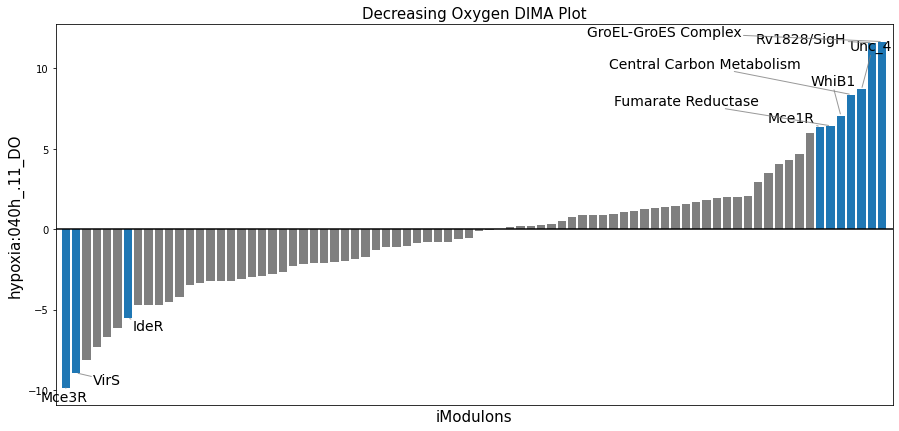

In [12]:
from adjustText import adjust_text
from pymodulon.util import dima

base_condition = "hypoxia:000h_.81_DO"
diff_condition = "hypoxia:040h_.11_DO"
threshold = 5

table = dima(ica_data,base_condition,diff_condition,threshold=threshold)

fig,ax = plt.subplots(figsize=[15,7])
dima_samples = ica_data.sample_table.loc[ica_data.sample_table["full_name"]==diff_condition].index
activity_data = (ica_data.A[dima_samples].mean(axis=1)).sort_values()

labels=[]
width = 0
bars = plt.bar(activity_data.index,activity_data)

# You can use this section to control which labels you want to display. Just add an additional if/else statement
# to filter out any labels that don't meet a certain criteria (Ex. Only put labels on activity greater than 10,
# but still color all points with activity greater than 5)
for i in range(0,len(activity_data)):
    if activity_data.index[i] in table.index:
        if "SG" in activity_data.index[i]:
            ax.bar(activity_data.index[i],activity_data[i],color="tab:grey")
        else:
            ax.bar(activity_data.index[i],activity_data[i],color="tab:blue")
            labels.append(ax.text(width, activity_data[i],activity_data.index[i],fontsize=14))        
    else:
        ax.bar(activity_data.index[i],activity_data[i],color="tab:gray")
    width+=1

adjust_text(labels,ax=ax, add_objects= bars, 
            arrowprops=dict(arrowstyle="-",color="gray",lw=1,alpha=.8,zorder=0))

ax.plot([-1,80],[0,0],color="black")
ax.set_xlim([-1,80])
ax.set_xlabel("iModulons",fontsize=15)
ax.set_ylabel("hypoxia:040h_.11_DO",fontsize=15)
ax.set_title("Decreasing Oxygen DIMA Plot",fontsize=15)
    
plt.xticks([])
#plt.savefig("../figures/interim_figures/Decreasing_Oxygen.svg",transparent=True)

# PhoP/WhiB3 Discovery

## Regulon/iModulon Venn Diagram

In [13]:
whib3_regulon = (ica_data.trn.loc[ica_data.trn["regulator"]=="Rv3416"]["gene_id"])
phoP_regulon = ica_data.trn.loc[ica_data.trn["regulator"]=="Rv0757"]
phoP_imodulon = ica_data.view_imodulon("PhoP").index

/home/sbrg/anaconda3/lib/python3.8/site-packages/matplotlib_venn/_venn3.py:53: UserWarning: Circle A has zero area
  warnings.warn("Circle A has zero area")
/home/sbrg/anaconda3/lib/python3.8/site-packages/matplotlib_venn/_venn3.py:57: UserWarning: Circle B has zero area
  warnings.warn("Circle B has zero area")


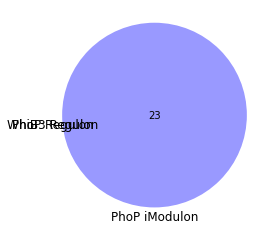

In [14]:
# PhoP and WhiB3 Regulon/iModulon Venn Diagram
venn3([set(phoP_regulon["gene_id"]),set(whib3_regulon),set(phoP_imodulon)],set_labels=["PhoP Regulon","WhiB3 Regulon","PhoP iModulon"])
#plt.savefig("../figures/interim_figures/PhoP_WhiB3_Venn.svg",transparent=True)

## Acquire all Samples

In [15]:
# Import new data maintain complete project
redox = ica_data.sample_table.groupby("project")
for i,j in redox:
    if i == "redox":
        redox_experiments = list(j.index)
redox_experiments.append("SRX6845147")
redox_experiments.append("SRX6845148")
redox_data = pd.read_csv("../data/raw_data/log_tpm.csv",index_col=0)
redox_data = redox_data[redox_experiments]
ref_cond =  list(redox_data[["SRX6845143","SRX6845144"]].mean(axis=1))
redox_data = redox_data.sub(ref_cond,axis='rows')
redox_data

,SRX5088615,SRX5088616,SRX6845150,SRX6845149,SRX6845151,SRX6845152,SRX6845145,SRX6845146,SRX6845142,SRX6845141,SRX6845144,SRX6845143,SRX6845147,SRX6845148
Geneid,,,,,,,,,,,,,,
Rv0001,0.993676,0.671256,-0.769873,-0.535399,-0.036152,0.129808,0.958851,1.425858,-0.145373,-0.393395,0.087040,-0.087040,-0.854459,0.311755
Rv0002,-1.243993,-0.890138,-2.909479,-3.664082,-0.113526,-0.572012,-2.896209,-2.636795,-0.766915,-0.671048,-0.064352,0.064352,-0.617087,-0.042377
Rv0003,0.170087,0.811200,-1.867871,-1.646401,-0.064587,-0.760274,-1.531906,-1.488078,-1.320323,-0.905884,-0.092599,0.092599,-0.427661,0.033170
Rv0004,0.466664,0.573266,-1.837566,-1.733794,0.081082,-0.185486,-2.578323,-1.496042,-0.580286,-0.960857,0.131005,-0.131005,-0.328791,-0.216682
Rv0005,1.974800,1.764652,-1.612130,-2.512744,-0.237356,0.375200,-2.389492,-2.788744,-0.213790,-0.552893,0.012605,-0.012605,0.012949,-0.411400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rv3920c,1.650818,1.422723,-2.648413,-3.060833,-0.250941,0.306538,-2.542617,-3.090046,-1.362721,-1.804424,0.021024,-0.021024,0.428294,0.374866
Rv3921c,0.952955,1.184082,-2.060222,-2.830618,-0.118838,0.698311,-2.478249,-2.630643,-1.632276,-1.546094,-0.009476,0.009476,0.040664,0.216013
Rv3922c,1.371747,1.667209,-1.799200,-3.657946,0.058111,0.714228,-2.304736,-1.682040,-0.798026,-1.151659,0.118634,-0.118634,0.290399,0.427061


In [16]:
# Utilize iModulon structure to infer activities
infered_DF = infer_activities(ica_data,redox_data)
infered_DF.head()

,SRX5088615,SRX5088616,SRX6845150,SRX6845149,SRX6845151,SRX6845152,SRX6845145,SRX6845146,SRX6845142,SRX6845141,SRX6845144,SRX6845143,SRX6845147,SRX6845148
SigH,-10.532588,-10.922569,1.566715,-1.687778,-1.447195,0.126496,2.068420,2.919608,3.194950,1.006150,-0.625656,0.625656,-2.912032,1.523775
Polyketide Synthase Complex,3.088632,2.938975,-3.231475,-5.648201,-2.256852,0.560154,-7.487963,-7.842691,-2.213032,-1.620478,-0.861865,0.861865,0.321306,-0.054124
IniR,2.176185,4.109829,3.314465,1.425826,3.429110,6.391821,4.895802,2.847116,-0.070658,-0.518907,0.864955,-0.864955,7.494142,5.221338
PyrR,5.064256,4.603100,2.444193,0.176021,0.387511,1.079212,1.641604,0.274912,-1.424244,-1.557462,0.334667,-0.334667,1.538999,-0.436590
WhiB4,15.318299,15.746483,8.121614,2.554048,0.479024,3.313251,0.347497,-0.816197,0.371172,-2.199745,1.530432,-1.530432,2.117858,-2.147489


In [17]:
# Average Replicates
groups = ica_data.sample_table.groupby(["project","condition"])
infered_DF_mean = pd.DataFrame(index = infered_DF.index)
for i,j in groups:
    if i[0] == "redox":
        infered_DF_mean[i[1]] = infered_DF[list(j.index)].mean(axis=1)
infered_DF_mean["whib3_ko_6.6"] = infered_DF[["SRX6845147","SRX6845148"]].mean(axis=1)
infered_DF_mean

,intra_basal,whib3_comp_4.5,whib3_comp_6.6,whib3_ko_4.5,wt_4.5,wt_6.6,whib3_ko_6.6
SigH,-10.727579,-0.060532,-0.660349,2.494014,2.100550,2.775558e-16,-0.694129
Polyketide Synthase Complex,3.013804,-4.439838,-0.848349,-7.665327,-1.916755,5.551115e-17,0.133591
IniR,3.143007,2.370146,4.910466,3.871459,-0.294783,4.996004e-16,6.357740
PyrR,4.833678,1.310107,0.733362,0.958258,-1.490853,-4.163336e-16,0.551204
WhiB4,15.532391,5.337831,1.896138,-0.234350,-0.914287,4.440892e-16,-0.014816
...,...,...,...,...,...,...,...
Unc_9,-2.168118,-1.699976,-0.695820,-1.491997,-2.019366,8.326673e-17,-0.745163
SG_13,-4.701003,-4.257871,-1.941337,-1.649345,0.787983,8.326673e-17,-2.383575
Central Carbon Metabolism,-12.320475,-22.596479,-0.463191,-30.652031,-2.912766,-9.714451e-17,-3.851884
Positive Regulation of Growth,13.760150,22.991029,0.825153,20.676713,5.379720,-6.245005e-16,2.939724


## Gene Expression Plot

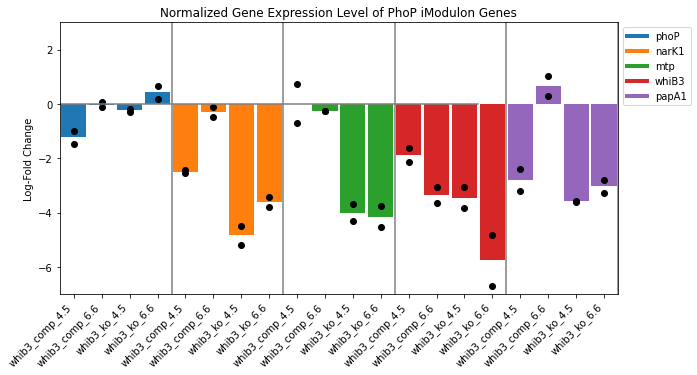

In [18]:
# Create gene log-tpm plot
fig,ax = plt.subplots(figsize = [10,5])

cmap = plt.cm.get_cmap("tab10")
colors = cmap(np.arange(cmap.N))

groups = ica_data.sample_table.groupby(["project","condition"])
projects = {}
for i,j in groups:
    if "redox" == i[0] and ("ko" in i[1] or "comp" in i[1]):
        projects.update({i[1]:list(j.index)})
projects.update({"whib3_ko_6.6":["SRX6845147","SRX6845148"]})
        
genes = ["Rv3416","Rv2329c","Rv3312A","Rv3824c","Rv0757"]

item_count = -.5
labels = []
color_count = 0
for i,row in redox_data.iterrows():
    if i in genes:
        for j in projects.items():
            ax.bar(i+":"+j[0],redox_data[j[1]].mean(axis=1).loc[i],width=.9,color = colors[color_count])
            for dot in j[1]:
                ax.plot(i+":"+j[0],redox_data[dot].loc[i],"o",color = "black")
            labels.append(j[0])
            item_count+=1
        color_count += 1
        ax.plot([item_count,item_count],[-7,4],color="tab:grey")

ax.plot([-.5,len(genes)*3-.5],[0,0],color = "tab:grey")
ax.set_ylim([-7,3])
ax.set_xlim([-.5,len(genes)*4-.5])

#text = plt.xticks(rotation="45",ha="right")
text = plt.xticks(ticks = range(0,len(genes)*4),labels=labels,rotation="45",ha="right")
ax.set_title("Normalized Gene Expression Level of PhoP iModulon Genes")
ax.set_ylabel("Log-Fold Change")

custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4),
                Line2D([0], [0], color=colors[3], lw=4),
                Line2D([0], [0], color=colors[4], lw=4)]

gene_names = ["phoP","narK1","mtp","whiB3","papA1"]
ax.legend(custom_lines,gene_names,bbox_to_anchor=(1, 1), loc='upper left')

#plt.savefig("../figures/interim_figures/PhoP_Expression_Plot.svg",transparent=True)

## Activity Plot

Text(0, 0.5, 'PhoP iModulon Activity')

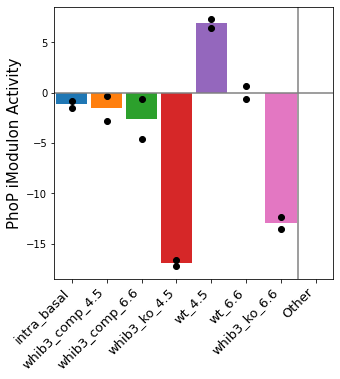

In [19]:
fig,ax = plt.subplots(figsize = [5,5])

cmap = plt.cm.get_cmap("tab10")
colors = cmap(np.arange(cmap.N))

groups = ica_data.sample_table.groupby(["project","condition"])
projects = {}
for i,j in groups:
    if "redox" == i[0]:
        projects.update({i[1]:list(j.index)})
projects.update({"whib3_ko_6.6":["SRX6845147","SRX6845148"]})

item_count = 0
labels = []
color_count = 0
for i in projects.items():
    ax.bar(i[0],infered_DF[i[1]].loc["PhoP"].mean(),zorder=0,width=.9)
    for dot in i[1]:
        ax.plot(item_count,infered_DF[dot].loc["PhoP"],"o",color = "black")
    labels.append(i[0])
    item_count+=1

non_mifH = ica_data.A.loc[imod]
for i in projects:
    non_mifH = non_mifH.drop(list(ica_data.sample_table.loc[ica_data.sample_table["project"]==i].index))
mean = non_mifH.mean()
std_dev = non_mifH.std()

ax.errorbar(label_count+1,mean,yerr= std_dev, label="Other", color = "black",
            marker=None ,capsize=10, capthick = 5,elinewidth=5)

ylimits = ax.get_ylim()
ax.set_xlim([-.5,item_count+.5])
ax.plot(list(ax.get_xlim()),[0,0],color="gray")
ax.set_ylim(ylimits)

seperators = [7]
sep_pos = -.5
for cord in seperators:
    sep_pos+=cord
    ax.plot([sep_pos,sep_pos],ylimits,color="gray")
    
labels.append("Other")
text = plt.xticks(ticks = range(0,len(projects)+1),labels=labels,rotation="45",ha="right",fontsize=13)

ax.set_ylabel("PhoP iModulon Activity",fontsize=15)
#plt.savefig("../figures/interim_figures/PhoP_Activities.svg",transparent =True)

# Rv0681 Discovery

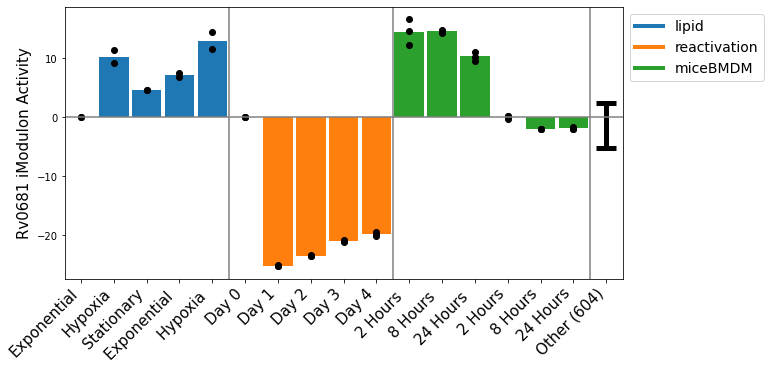

In [20]:
#Put projects of interest here
projects = ["lipid","reactivation","miceBMDM"]
#Put IMod whose activities you would like to look at here
imod = "Rv0681"



cmap = plt.cm.get_cmap("tab10")
colors = cmap(np.arange(cmap.N))

fig,ax = plt.subplots(figsize=[10,5])
seperators = []
dots = []
# Put in labels of the conditions. You need one label for every condition in every project. The labels
# will be put in order from left to right. 
labels=["Exponential","Hypoxia","Stationary","Exponential ","Hypoxia ",
        "Day 0","Day 1","Day 2","Day 3","Day 4",
        "2 Hours ", "8 Hours ", "24 Hours ", "2 Hours","8 Hours","24 Hours",
        ]

label_count = 0
color_count = 0
for project in projects:
    for i,j in ica_data.sample_table.groupby(["project","condition"]):
        if i[0] ==  project:
            if i[0] == "stress":
                if i[1] in [".4_gluc","1_days_low_iron","7_days_low_iron","high_iron"]:
                    dots.append(list(ica_data.A[j.index].loc[imod]))
                    ax.bar(labels[label_count],ica_data.A[j.index].mean(axis=1)[imod],
                           width=.9,color=colors[color_count])
                    label_count+=1
            else:
                dots.append(list(ica_data.A[j.index].loc[imod]))
                ax.bar(labels[label_count],ica_data.A[j.index].mean(axis=1)[imod],
                       width=.9,color=colors[color_count])
                label_count+=1
    color_count+=1
        
            

sep_pos = -.5
dot_pos = 0
    
for condition in dots:
    for dot in condition:
        ax.plot(dot_pos,dot,"ko")
    dot_pos+=1
    
non_mifH = ica_data.A.loc[imod]
for i in projects:
    non_mifH = non_mifH.drop(list(ica_data.sample_table.loc[ica_data.sample_table["project"]==i].index))
mean = non_mifH.mean()
std_dev = non_mifH.std()

ax.errorbar(label_count,mean,yerr= std_dev, label="Other", color = "black",
            marker=None ,capsize=10, capthick = 5,elinewidth=5)

ylimits = ax.get_ylim()
ax.set_xlim([-.5,label_count+.5])
ax.plot(list(ax.get_xlim()),[0,0],color="gray")
ax.set_ylim(ylimits)
ax.set_ylabel(imod+" iModulon Activity",fontsize=15)

# This section controls how the seperators are put down. You count the number of samples in each project and 
# combine them in a array
seperators = [5,5,6]

for cord in seperators:
    sep_pos+=cord
    ax.plot([sep_pos,sep_pos],ylimits,color="gray")

custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4)]
ax.legend(custom_lines,projects,bbox_to_anchor=(1, 1), loc='upper left',fontsize=14)

labels.append("Other ("+str(len(non_mifH))+")")
plt.xticks(labels,fontsize=15)
for label in ax.get_xmajorticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment("right")
    
#plt.savefig("../figures/interim_figures/Rv0681_Activities.svg",transparent=True)

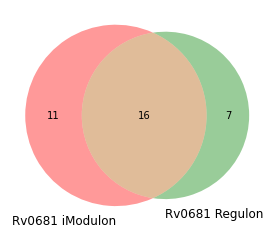

In [21]:
rv0681_imod = set(ica_data.view_imodulon("Rv0681").index)
rv0681_regulon = set(ica_data.trn.loc[ica_data.trn["regulator"]=="Rv0681"].gene_id)
venn2([rv0681_imod,rv0681_regulon],["Rv0681 iModulon","Rv0681 Regulon"])
#plt.savefig("../figures/interim_figures/Rv0681_Regulon_Venn.svg",transparent=True)